# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

<h1>Ali Momtahen
810100213</h2>

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)

In [76]:
# import
import numpy as np
import pygame
import gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import time

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [77]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False ,  render_mode = "rgb_array")
learning_rate = 0.1

In [78]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
#r = env.render()


you can see the environment in each step by render command :


(0, {'prob': 1})

In [79]:
# Total no. of states
env.observation_space.n

16

In [80]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

<p style="text-align:center">
در این الگوریتم ما بهترین اکشن برای هر استیت را انتخاب می کنیم با توجه به فرمول بعد با توجه به جایزه ای که دریافت می کنیم استیت ولیو ها را آپدیت می کنیم
</p>

<a name='1-1'></a>
### Question 2:

In [81]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.duration = np.inf

    def value_estimation(self):
        self.delta = np.inf
        curr_time= time.time()
        self.episode = 0
        while(self.delta > self.theta):
            self.episode += 1
            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                         action_value += probability* (reward + self.discount_factor * self.state_values[next_state])
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

                if (self.delta < self.theta):
                    break
        self.duration = time.time() - curr_time
        
    def take_action(self, action):
        next_state, reward, done, _  , _= self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state , _ = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

<p style="text-align:center">
الگوریتم این گونه است که ما ابتدا یک پالیسی انتخاب می کنیم و بعد بر اساس آن ولیو استیت ها را آپدیت می کنیم تا وقتی که آن ها همگرا بشوند حالا با استفاده از ولیو استیت ها پالیسی را آپدیت می کنیم حالا این فرآیند را اینقدر انجام می دهیم تا خود پالیسی همگرا شده و تغیر نکند
</p>

<a name='1-2'></a>
### Question 4:

In [82]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        
        self.delta = np.inf
        while(self.delta >= self.theta):
            self.episode += 1
            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    new_state_value += probability* (reward + self.discount_factor * self.state_values[next_state])
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])
    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False
        self.delta = np.inf
        self.episode = 0
        curr_time = time.time()
        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()
        self.duration = time.time() - curr_time
        

    def take_action(self, action):
        next_state, reward, done, _ , _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state , _ = self.env.reset()
        return initial_state

<a name='1-3'></a>
### Question 5:

In [83]:
def print_val(table):
    row = 0
    col = 0
    print("state value :")
    print("______________________________")

    for v in table:
        print("| " , "%.2f" % v , end=' ')
        col = (col + 1) % 4
        if(col == 0):
            print("|")
            print("______________________________")


def print_pol(model):
    row = 0
    col = 0
    print("policy:")
    print("______________________________")
    ls = ['U', 'D' , 'R' , 'L']
    for state in range(model.env.observation_space.n):
        v = model.get_optimal_policy(state)

        print("| " , ls[v] , end=' ')
        col = (col + 1) % 4
        if(col == 0):
            print("|")
            print("______________________________")
    

<a name='1-3-1'></a>
#### Value Iteration:

In [84]:
discount_factor = 0.9

model_val_min = ValueIteration(env , discount_factor )
val_list_duration = []
val_list_episode = []
for i in range(40):
    model_val = ValueIteration(env , discount_factor )
    model_val.value_estimation()


    curr_state = model_val.reset()
    end = 0
    while end == 0 :
        action = model_val.get_optimal_policy(curr_state)
        curr_state , reward , end = model_val.take_action(action)
        
    val_list_duration.append(model_val.duration)
    val_list_episode.append(model_val.episode)
    if(model_val.duration < model_val_min.duration):
        model_val_min = model_val
    
val_average_episode = sum(val_list_episode) / len(val_list_episode)
val_average_duration = sum(val_list_duration) / len(val_list_duration)
value_table_val = model_val_min.get_state_values()
print_val(value_table_val)
print_pol(model_val_min)

state value :
______________________________
|  0.59 |  0.66 |  0.73 |  0.66 |
______________________________
|  0.66 |  0.13 |  0.81 |  0.13 |
______________________________
|  0.73 |  0.81 |  0.90 |  0.13 |
______________________________
|  0.13 |  0.90 |  1.00 |  0.00 |
______________________________
policy:
______________________________
|  D |  R |  D |  U |
______________________________
|  D |  U |  D |  U |
______________________________
|  R |  D |  D |  U |
______________________________
|  U |  R |  R |  U |
______________________________


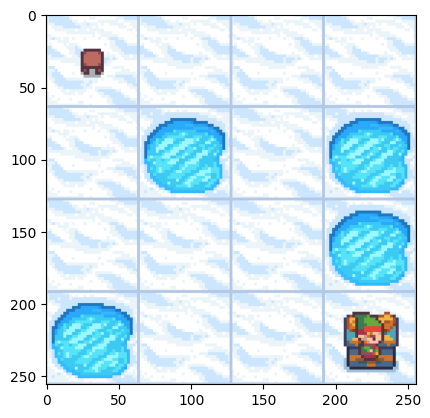

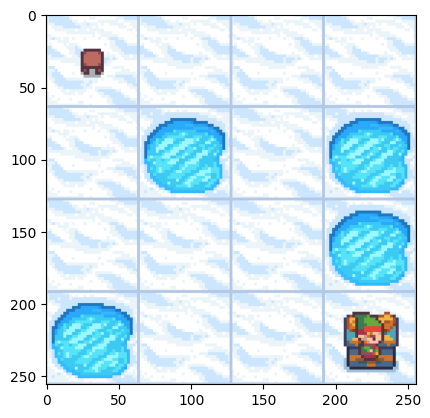

In [85]:
model_val = model_val_min


curr_state = model_val.reset()
end = 0
while end == 0 :
    action = model_val.get_optimal_policy(curr_state)
    curr_state , reward , end = model_val.take_action(action)
    time.sleep(0.5)
    img = model_val.env.render()
    plt.imshow(img)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

<a name='1-3-2'></a>
#### Policy Iteration:

In [86]:
model_pol_min = PolicyIteration(env , discount_factor )
model_pol_min.duration = np.inf
pol_duration_list = []
pol_list_episode = []
for i in range(40):
    model_pol = PolicyIteration(env , discount_factor )
    model_pol.policy_estimation()
    curr_state = model_pol.reset()
    end = 0 
    while(end ==0):
        action = model_pol.get_optimal_policy(curr_state )
        curr_state  , reward , end = model_pol.take_action(action)        
        
    pol_list_episode.append(model_pol.episode)
    pol_duration_list.append(model_pol.duration)
    if(model_pol.duration < model_pol_min.duration):
        model_pol_min = model_pol
    


pol_average_episode = sum(pol_list_episode) / len(pol_list_episode)
pol_average_duration = sum(pol_duration_list) / len(pol_duration_list)
value_table_pol = model_pol_min.get_state_values()
print_val(value_table_pol)
print_pol(model_pol_min)
    

state value :
______________________________
|  0.59 |  0.66 |  0.73 |  0.66 |
______________________________
|  0.66 |  0.00 |  0.81 |  0.00 |
______________________________
|  0.73 |  0.81 |  0.90 |  0.00 |
______________________________
|  0.00 |  0.90 |  1.00 |  0.00 |
______________________________
policy:
______________________________
|  D |  R |  D |  U |
______________________________
|  D |  U |  D |  U |
______________________________
|  R |  D |  D |  U |
______________________________
|  U |  R |  R |  U |
______________________________


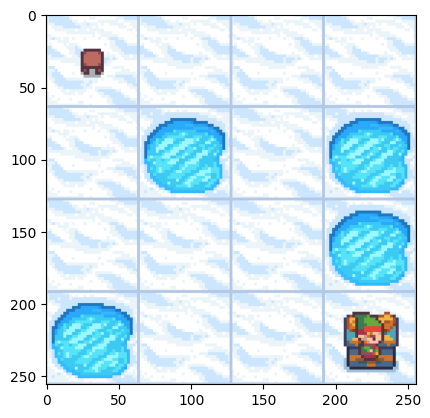

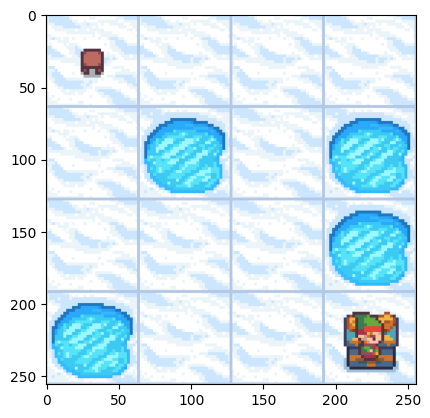

In [87]:
model_pol = model_pol_min
curr_state = model_pol.reset()
end = 0 
while(end ==0):
    action = model_pol.get_optimal_policy(curr_state )
    curr_state  , reward , end = model_pol.take_action(action)        
    time.sleep(0.5)
    img = model_pol.env.render()
    plt.imshow(img)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

<a name='1-4'></a>
### Question 6:

<a name='1-4-1'></a>
#### Value Iteration:

In [88]:

print(f'ValueItration time is: {val_average_duration}  and policyItration is : {pol_average_duration}')
print(f'ValueItration episode is: {val_average_episode}  and policyItration is : {pol_average_episode}')



ValueItration time is: 0.002640897035598755  and policyItration is : 0.03321762084960937
ValueItration episode is: 7.0  and policyItration is : 152.0


<p style="text-align:center">
می بینم که مقدار سرعت همگرایی پالیسی کمتر از ولیو ایتریشن است که به نظر من دلیل آن کم بودن پارامتر هاست در این مسئله
همچنین مقدار اپیزود ها هم در آن بیشتر است
</p>

<a name='1-4-2'></a>
#### Policy Iteration:

In [89]:
print("ValueIteration :" , )
print_val(value_table_val)
print("PolicyIteration :")
print_val(value_table_pol)


ValueIteration :
state value :
______________________________
|  0.59 |  0.66 |  0.73 |  0.66 |
______________________________
|  0.66 |  0.13 |  0.81 |  0.13 |
______________________________
|  0.73 |  0.81 |  0.90 |  0.13 |
______________________________
|  0.13 |  0.90 |  1.00 |  0.00 |
______________________________
PolicyIteration :
state value :
______________________________
|  0.59 |  0.66 |  0.73 |  0.66 |
______________________________
|  0.66 |  0.00 |  0.81 |  0.00 |
______________________________
|  0.73 |  0.81 |  0.90 |  0.00 |
______________________________
|  0.00 |  0.90 |  1.00 |  0.00 |
______________________________


<p style="text-align:center">
مشاهده می کنیم که مقدار ولیو استیت ها با هم تفاوتی ندارند فقط در پالیسی ایتریشن برای دریاچه مقدار 0 در نظر گرفته شده اما این مقدار برای ولیو ایتریشن 0.13  می باشد
دلیل آن این است که درپالیسی ما مقداری که ما محیط را برسی میکنیم بیشتر از دیگری است بنابر این فرصت لازم برای 0 کردن ولیو این استیت را به آن می دهد</p>
<p style="text-align:center">
همچنین در پایین می بینیم که مقدار سیاست بهینه در دو الگوریتم یکسان است
</p>

In [90]:
print("ValueIteration :" , )
print_pol(model_val)
print("PolicyIteration :")
print_pol(model_pol)



ValueIteration :
policy:
______________________________
|  D |  R |  D |  U |
______________________________
|  D |  U |  D |  U |
______________________________
|  R |  D |  D |  U |
______________________________
|  U |  R |  R |  U |
______________________________
PolicyIteration :
policy:
______________________________
|  D |  R |  D |  U |
______________________________
|  D |  U |  D |  U |
______________________________
|  R |  D |  D |  U |
______________________________
|  U |  R |  R |  U |
______________________________


<a name='2'></a>
## Part 2: Q-Learning Algorithm

<a name='2-1'></a>
### Question 7:

<p style="text-align:center">
در این الگوریتم روش انتخاب اکشن ما به این صورت است که در ابتدا یک مقداری را تعریف می کنیم بعد به صورت رندوم اگر مقداری کمتر از آن شد اکشن را به صورت رندوم انتخاب می کنیم در غیر این صورت بهترین اکشن را انتخاب می کنیم
حالا بعد از هر اکشن با توجه به فرمول و ریوارد و نرخ یادگیری مقدار استیت را آپدیت می کنیم
همچنین با توجه به مقدار استیت مقصدآپدیت را انجام میدهیم. مامور ما در اینجا خودش هر اکشن را انجام می دهد و آن را می سنجد 
</p>

In [91]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 213

In [92]:
# environment
env = gym.make('Taxi-v3' )


Initial_State , _ = env.reset(seed= STUDENT_NUM )
Initial_State

324

In [93]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State)
taxi_row, taxi_col, pass_idx, dest_idx

(3, 1, 1, 0)

In [94]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
#env.render()

you can see the environment in each step by render command :


In [95]:
# Total no. of states
env.observation_space.n

500

In [96]:
# Total no. of actions
env.action_space.n
import random

<a name='2-1'></a>
### Question 8:

In [97]:
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed
      self.total_reward = 0

    def choose_action(self, state):
      prob = random.random()
      if(prob < self.epsilon):
        action = random.randint(0 , 5)
      else:
        action  = np.argmax(self.q_table[state , :])
      return action

    def update_q_table(self, state, action, nextState, reward):
    
      
      self.q_table[state][action] = (1 - self.learning_rate)* self.q_table[state][action] + self.learning_rate*(
                           reward +  self.discount_factor*(self.q_table[nextState][np.argmax(self.q_table[nextState , :])]))
     

    def decay_epsilon(self, episode):
      
      self.epsilon = self.epsilon * ((episode+ 2000) / (episode +2001)) 
      

    def decrease_learning_rate(self, episode):
     
      if(self.learning_rate > 0.01):
        self.learning_rate = self.learning_rate - 0.005

    def take_action(self, action):
      next_state, reward, done, _ , _ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      # self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)

In [98]:
# base code for Q-learning

env = gym.make('Taxi-v3' , render_mode = "rgb_array")


total_q_list = []
reward_list = [ ]
reward_list2 = [0 for i in range(EPISODES)]
episode_list = [i for i in range(EPISODES)]
agent_list = []


for rep in range(REPS):
    
    reward_list.append([])
    agent = QLearningAgent(env , EPSILON , LEARNING_RATE ,DISCOUNT , STUDENT_NUM)
    #print(rep)
    tot_reward = 0
    for episode in range(EPISODES):
        
        curr_state  , _= agent.reset()
        done = 0 
        count = 1
        sum_reward =0
        while not done:
            
            action = agent.choose_action(curr_state)
            next_state , reward , done  = agent.take_action(action)
            sum_reward += reward
            agent.update_q_table(curr_state , action , next_state , reward)
            count +=1
            curr_state = next_state
            if done:
                break
        agent.decay_epsilon(episode)
        ##
        #agent.decrease_learning_rate(episode)
        reward_list[rep].append(sum_reward)
        tot_reward += sum_reward
        reward_list2[episode] += sum_reward
    agent_list.append(agent)    
    total_q_list.append(agent.get_q_values())



for i in range(EPISODES):
    reward_list2[i] = reward_list2[i] / REPS

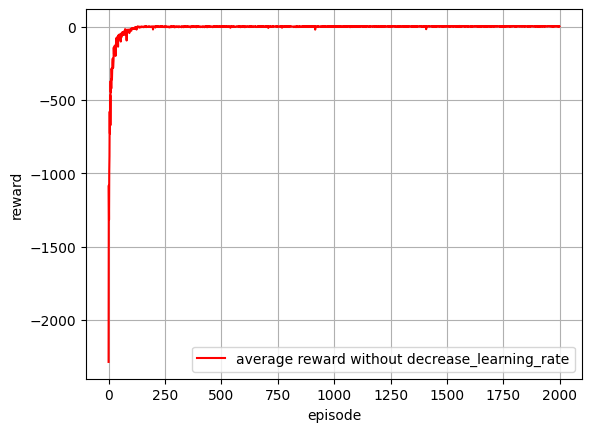

In [99]:
plt.plot(episode_list , reward_list2  , color = 'r'  , label='average reward without decrease_learning_rate' )
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()
plt.grid()
plt.show()

<a name='2-2'></a>
### Question 9:

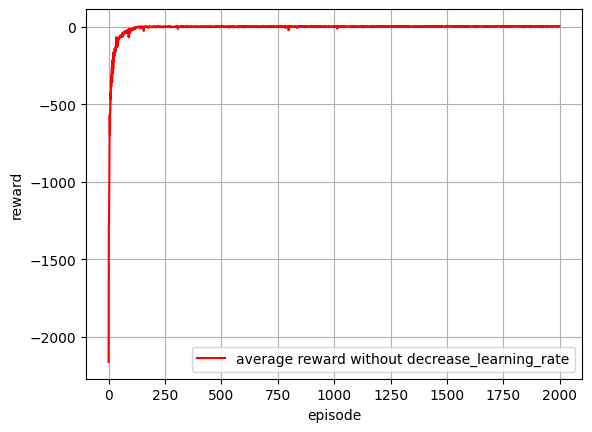
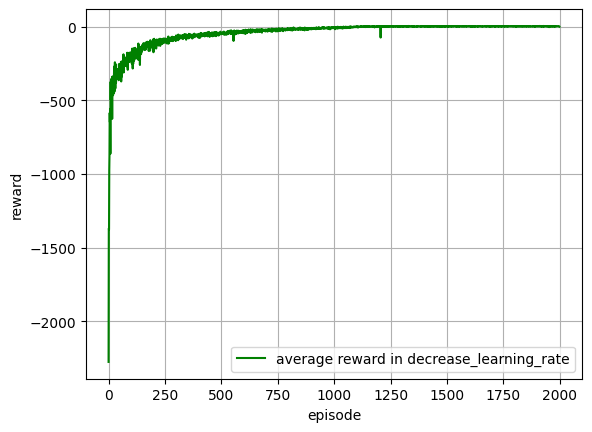

<p style="text-align:center">
نمودار قرمز نشان دهنده سیاست بدون تغیر نرخ یادگیری است و نمودار سبز رنگ با سیاست کاهش نرخ یادگیری می باشد پیش فرض ذهنی ما این بود که کاهش نرخ یادگیری به الگوریتم ما کمک کند
</p>
<p style="text-align:center">
مشاهده می کنیم که الگوریتم با learning rate کاهشی بسیار دیر تر از دیگری به همگرایی می رسد
و برای این مسئله سیاست ساده تر بهتر عمل کرده است
همچنین می بینم که میزان نوسان و نویز در وقتی که نرخ یادگیری کاهشی است بیشتر می باشد
مقدار همگرایی هر دو روش هم برابر و تقریبا 0 است
</p>
<p style="text-align:center">
برای کاهش اپسیلون در طول فرآیند به این صورت عمل می کنیم که برای هر اپیزود  اپسیلون قبلی را ضرب در کسری می کنیم که این کسر کوچک تر از 1 است
مقدار صورت این کسر از جمع اپیزود فعلی با 2000 به دست می آید و مخرج آن برابر صورت به علاوه 1 است</p>

<a name='2-3'></a>
### Question 10:

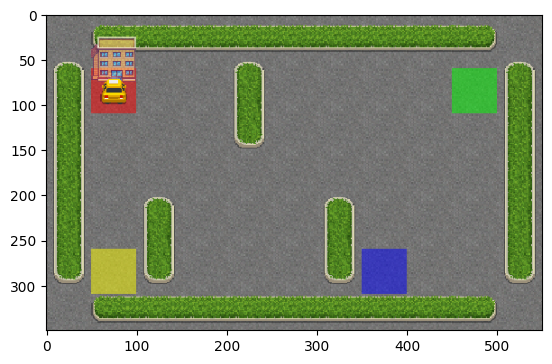

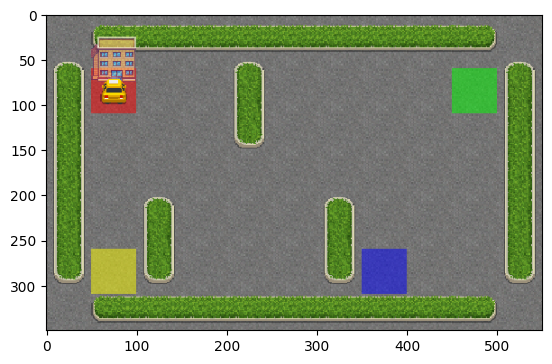

In [100]:
best_agent = agent_list[0]
for ag in agent_list:
    if ag.total_reward > best_agent.total_reward:
        best_agent = ag

curr_state  , _= agent.reset()
done = 0 
while not done:
    action = agent.choose_action(curr_state)
    next_state , reward , done  = agent.take_action(action)
    sum_reward += reward
    curr_state = next_state
    time.sleep(0.1)
    img = agent.env.render()
    plt.imshow(img)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())